#Question
You MUST build on top of what we have coded in the class (to prevent anyone from just copying from the internet).

1.  Try a real corpus (instead of banana apple, try something real... on the internet....) - not so big!  Just so you have a good taste of real stuff....like 50 documents, each having 50 words...(really up to you)

2. Try a window size of 2

3. Implement CBOW (instead of skipgrams)

4. Compare normal version of skipgrams vs. negative sampling version of skipgrams in terms of time (using real corpus)

Point criteria:
0: not done/copy directly from your friend (inspired is ok)
1: ok
2: with comments, and a nice explanation along the notebook (like how Chaky do his tutorial...)

Submit as GitHub link.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
np.__version__, torch.__version__

('1.21.6', '1.13.1+cu116')

In [3]:
import matplotlib
matplotlib.__version__

'3.2.2'

#1. ***Load Data*** 

In [14]:
#Specify the sentence/corpus
# i am using 15 sentences and each have 10 words
corpus = ["My mother is an ordinary woman she is my superhero.","in every step of my, she supported and encouraged me.","whether day or night she was always there for me","no matter what the condition is. furthermore, her every work,",
          "persistence, devotion, dedication, conduct is an inspiration for me. in","this essay on my mother, i am going to talk","about my mother and why she is so special to",
          "me. she is an essence of truthfulness, love, and sincerity.","another reason is that she showers her family with her","blessing and live. furthermore, she gives us everything but never",
          "demand anything in return. the way she cares for everyone","in family inspires me to the same in my future.",
          "also, her love is not just for the family she","treats every stranger and animals the same way she did","to me.she is very kind and sensible towards animals."
          ]

In [15]:
#split corpus/tokenization
corpus_token = [sent.split(" ") for sent in corpus]
corpus_token

[['My',
  'mother',
  'is',
  'an',
  'ordinary',
  'woman',
  'she',
  'is',
  'my',
  'superhero.'],
 ['in',
  'every',
  'step',
  'of',
  'my,',
  'she',
  'supported',
  'and',
  'encouraged',
  'me.'],
 ['whether',
  'day',
  'or',
  'night',
  'she',
  'was',
  'always',
  'there',
  'for',
  'me'],
 ['no',
  'matter',
  'what',
  'the',
  'condition',
  'is.',
  'furthermore,',
  'her',
  'every',
  'work,'],
 ['persistence,',
  'devotion,',
  'dedication,',
  'conduct',
  'is',
  'an',
  'inspiration',
  'for',
  'me.',
  'in'],
 ['this', 'essay', 'on', 'my', 'mother,', 'i', 'am', 'going', 'to', 'talk'],
 ['about', 'my', 'mother', 'and', 'why', 'she', 'is', 'so', 'special', 'to'],
 ['me.',
  'she',
  'is',
  'an',
  'essence',
  'of',
  'truthfulness,',
  'love,',
  'and',
  'sincerity.'],
 ['another',
  'reason',
  'is',
  'that',
  'she',
  'showers',
  'her',
  'family',
  'with',
  'her'],
 ['blessing',
  'and',
  'live.',
  'furthermore,',
  'she',
  'gives',
  'us',
  'e

In [17]:
#marge all list and get unique words 
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus_token)))
vocab


['reason',
 'why',
 'essay',
 'future.',
 'towards',
 'sincerity.',
 'persistence,',
 'with',
 'My',
 'showers',
 'about',
 'to',
 'this',
 'ordinary',
 'matter',
 'every',
 'mother,',
 'return.',
 'very',
 'but',
 'anything',
 'live.',
 'kind',
 'never',
 'not',
 'dedication,',
 'her',
 'blessing',
 'me.she',
 'on',
 'devotion,',
 'always',
 'me.',
 'day',
 'supported',
 'woman',
 'going',
 'that',
 'just',
 'what',
 'special',
 'love',
 'in',
 'everything',
 'conduct',
 'i',
 'another',
 'so',
 'she',
 'furthermore,',
 'for',
 'way',
 'everyone',
 'step',
 'family',
 'also,',
 'or',
 'is.',
 'did',
 'night',
 'condition',
 'inspires',
 'superhero.',
 'my',
 'us',
 'is',
 'encouraged',
 'of',
 'my,',
 'an',
 'cares',
 'was',
 'and',
 'love,',
 'demand',
 'me',
 'no',
 'treats',
 'the',
 'am',
 'gives',
 'sensible',
 'truthfulness,',
 'inspiration',
 'same',
 'animals',
 'essence',
 'whether',
 'animals.',
 'mother',
 'stranger',
 'work,',
 'talk',
 'there']

In [18]:
#numericalization
word2idx = {w: i for i, w in enumerate(vocab)}
word2idx

{'reason': 0,
 'why': 1,
 'essay': 2,
 'future.': 3,
 'towards': 4,
 'sincerity.': 5,
 'persistence,': 6,
 'with': 7,
 'My': 8,
 'showers': 9,
 'about': 10,
 'to': 11,
 'this': 12,
 'ordinary': 13,
 'matter': 14,
 'every': 15,
 'mother,': 16,
 'return.': 17,
 'very': 18,
 'but': 19,
 'anything': 20,
 'live.': 21,
 'kind': 22,
 'never': 23,
 'not': 24,
 'dedication,': 25,
 'her': 26,
 'blessing': 27,
 'me.she': 28,
 'on': 29,
 'devotion,': 30,
 'always': 31,
 'me.': 32,
 'day': 33,
 'supported': 34,
 'woman': 35,
 'going': 36,
 'that': 37,
 'just': 38,
 'what': 39,
 'special': 40,
 'love': 41,
 'in': 42,
 'everything': 43,
 'conduct': 44,
 'i': 45,
 'another': 46,
 'so': 47,
 'she': 48,
 'furthermore,': 49,
 'for': 50,
 'way': 51,
 'everyone': 52,
 'step': 53,
 'family': 54,
 'also,': 55,
 'or': 56,
 'is.': 57,
 'did': 58,
 'night': 59,
 'condition': 60,
 'inspires': 61,
 'superhero.': 62,
 'my': 63,
 'us': 64,
 'is': 65,
 'encouraged': 66,
 'of': 67,
 'my,': 68,
 'an': 69,
 'cares': 70

In [19]:
#vocab size
vocab_size = len(vocab)
vocab_size

94

In [20]:
#append unk
vocab.append('<UNK>')

In [21]:
word2idx['<UNK>'] = 94

In [22]:
#if we need to use
idx2word = {v:k for k, v in word2idx.items()}

***2. Prepare Train Data***

In [23]:
for e in corpus_token:
    print(e)

['My', 'mother', 'is', 'an', 'ordinary', 'woman', 'she', 'is', 'my', 'superhero.']
['in', 'every', 'step', 'of', 'my,', 'she', 'supported', 'and', 'encouraged', 'me.']
['whether', 'day', 'or', 'night', 'she', 'was', 'always', 'there', 'for', 'me']
['no', 'matter', 'what', 'the', 'condition', 'is.', 'furthermore,', 'her', 'every', 'work,']
['persistence,', 'devotion,', 'dedication,', 'conduct', 'is', 'an', 'inspiration', 'for', 'me.', 'in']
['this', 'essay', 'on', 'my', 'mother,', 'i', 'am', 'going', 'to', 'talk']
['about', 'my', 'mother', 'and', 'why', 'she', 'is', 'so', 'special', 'to']
['me.', 'she', 'is', 'an', 'essence', 'of', 'truthfulness,', 'love,', 'and', 'sincerity.']
['another', 'reason', 'is', 'that', 'she', 'showers', 'her', 'family', 'with', 'her']
['blessing', 'and', 'live.', 'furthermore,', 'she', 'gives', 'us', 'everything', 'but', 'never']
['demand', 'anything', 'in', 'return.', 'the', 'way', 'she', 'cares', 'for', 'everyone']
['in', 'family', 'inspires', 'me', 'to', '

#Word2index

In [24]:
skipgram = []
for sent in corpus_token:
    for i in range(2, len(sent) - 2): 
        center_word = sent[i]
        outside_words = [sent[i-2], sent[i-1], sent[i+1], sent[i+2]]  #window_size = 2
        for o in outside_words:
            skipgram.append([center_word, o])

In [25]:
def random_batch(batch_size, word_sequence):
    
    skip_gram = []

    for sent in corpus_token:                          # loop each word sequence
        for i in range(2, len(sent) - 2):
            target = word2idx[sent[i]]
            context = [word2idx[sent[i - 2]], word2idx[sent[i - 1]], word2idx[sent[i + 1]], word2idx[sent[i + 2]]] # window size 2
            for w in context:
                skip_gram.append([target, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_gram)), batch_size, replace=False) #pick without replacement rendomly
        
    for i in random_index:
      # target word like 2
        random_inputs.append([skip_gram[i][0]])  
        # context word like 3
        random_labels.append([skip_gram[i][1]])  
            
    return np.array(random_inputs), np.array(random_labels)

Method Testing

In [26]:
#testing the method
# mini-batch size
batch_size = 2 
input_batch, target_batch = random_batch(batch_size, corpus_token)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[65]
 [49]]
Target:  [[24]
 [48]]


**Model**

In [27]:
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size)
        self.embedding_u = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, target_words, all_vocabs):
      # batch_size, 1, emb_size
        center_embeds = self.embedding_v(center_words)
        target_embeds = self.embedding_u(target_words) 
        all_embeds    = self.embedding_v(all_vocabs) #batch_size, voc_size, emb_size
        # print(all_embeds.shape)
        
        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) 
        return nll 

**Training**

In [29]:
batch_size     = 2 
embedding_size = 2 #later plot
model          = Skipgram(len(vocab), embedding_size)

optimizer = optim.Adam(model.parameters(), lr=0.001)
model

Skipgram(
  (embedding_v): Embedding(95, 2)
  (embedding_u): Embedding(95, 2)
)

In [31]:
def prepare_sequence(seq, word2idx):
    idx = list(map(lambda w: word2idx[w] if word2idx.get(w) is not None else word2idx["<UNK>"], seq))
    return torch.LongTensor(idx)

#use for normalized term in the probability calculation
all_vocabs = prepare_sequence(list(vocab), word2idx).expand(batch_size, len(vocab))  
all_vocabs.shape

torch.Size([2, 95])

In [32]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_min = int(elapsed_time / 60)
    elapsed_sec = int(elapsed_time - (elapsed_min * 60))

    return elapsed_min, elapsed_sec

In [33]:
import time

In [34]:
start_train = time.time()

# Training
num_epochs = 50000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus_token)
    input_batch  = torch.LongTensor(input_batch)  
    target_batch = torch.LongTensor(target_batch) 
    # print(target_batch.shape)
    # print(input_batch.shape)
    

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

total = time.time() - start_train
print('Total time:', total)

Epoch: 1000 | cost: 4.630462 | time: 0m 0s
Epoch: 2000 | cost: 2.785746 | time: 0m 0s
Epoch: 3000 | cost: 4.585916 | time: 0m 0s
Epoch: 4000 | cost: 4.331287 | time: 0m 0s
Epoch: 5000 | cost: 2.745359 | time: 0m 0s
Epoch: 6000 | cost: 4.576880 | time: 0m 0s
Epoch: 7000 | cost: 3.379042 | time: 0m 0s
Epoch: 8000 | cost: -0.856602 | time: 0m 0s
Epoch: 9000 | cost: 1.253890 | time: 0m 0s
Epoch: 10000 | cost: 3.834155 | time: 0m 0s
Epoch: 11000 | cost: 2.685445 | time: 0m 0s
Epoch: 12000 | cost: 2.640347 | time: 0m 0s
Epoch: 13000 | cost: -0.481948 | time: 0m 0s
Epoch: 14000 | cost: -1.404057 | time: 0m 0s
Epoch: 15000 | cost: 1.884574 | time: 0m 0s
Epoch: 16000 | cost: 0.590793 | time: 0m 0s
Epoch: 17000 | cost: 1.900640 | time: 0m 0s
Epoch: 18000 | cost: 2.839514 | time: 0m 0s
Epoch: 19000 | cost: -0.118984 | time: 0m 0s
Epoch: 20000 | cost: 0.449072 | time: 0m 0s
Epoch: 21000 | cost: 4.584888 | time: 0m 0s
Epoch: 22000 | cost: 0.422704 | time: 0m 0s
Epoch: 23000 | cost: 3.068161 | time:

Negative Sampling

Unigram Distribution 

In [48]:
X = 0.001

from collections import Counter

word_count = Counter(flatten(corpus_token))
total_words = sum([c for w, c in word_count.items()])
total_words

149

In [49]:
word_count['she']

10

In [52]:
unigram_table = []

for vo in vocab:
    unigram_table.extend([vo] * int(((word_count[vo]/total_words)**0.75)/X))

 

In [53]:
Counter(unigram_table)

Counter({'reason': 23,
         'why': 23,
         'essay': 23,
         'future.': 23,
         'towards': 23,
         'sincerity.': 23,
         'persistence,': 23,
         'with': 23,
         'My': 23,
         'showers': 23,
         'about': 23,
         'to': 66,
         'this': 23,
         'ordinary': 23,
         'matter': 23,
         'every': 53,
         'mother,': 23,
         'return.': 23,
         'very': 23,
         'but': 23,
         'anything': 23,
         'live.': 23,
         'kind': 23,
         'never': 23,
         'not': 23,
         'dedication,': 23,
         'her': 66,
         'blessing': 23,
         'me.she': 23,
         'on': 23,
         'devotion,': 23,
         'always': 23,
         'me.': 53,
         'day': 23,
         'supported': 23,
         'woman': 23,
         'going': 23,
         'that': 23,
         'just': 23,
         'what': 23,
         'special': 23,
         'love': 23,
         'in': 78,
         'everything': 23,
        

Noe Negative Sampling

In [54]:
import random

In [55]:
def prepare_sequence(seq, word2idx):
    idx = list(map(lambda w: word2idx[w] if word2idx.get(w) is not None else word2idx["<UNK>"], seq))
    return torch.LongTensor(idx)

def negative_sampling(targets, unigram_table, x):
    batch_size = targets.size(0)
    neg_sample = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < x:                                                       # num of sampling
            neg = random.choice(unigram_table)
            if word2idx[neg] == target_index:
                continue
            nsample.append(neg)
        neg_sample.append(prepare_sequence(nsample, word2idx).view(1, -1))
    
    return torch.cat(neg_sample)

Testing

In [56]:
# input_batch  = torch.Tensor(input_batch)
# target_batch = torch.LongTensor(target_batc
type(input_batch)

torch.Tensor

In [57]:
target_batch.shape

torch.Size([2, 1])

In [58]:
num_neg = 4
negative_sampling(target_batch, unigram_table, num_neg)

tensor([[26, 48, 72, 58],
        [10, 13, 54, 61]])

Model

In [59]:
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        #embedding
        self.embedding_v = nn.Embedding(vocab_size, emb_size) # center 
        self.embedding_u = nn.Embedding(vocab_size, emb_size) # out 
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, target_words, negative_words):
      # [batch_size, 1, emb_size]
        center_embeds = self.embedding_v(center_words) 
        target_embeds = self.embedding_u(target_words) 
        neg_embeds    = -self.embedding_u(negative_words) # [batch_size, num_neg, emb_size]
        
        positive_score = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
       
        
        negative_score = neg_embeds.bmm(center_embeds.transpose(1, 2))
        
        
        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)
                
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embed = self.embedding_v(inputs)
        
        return embed

Training

In [60]:
batch_size     = 2 
embedding_size = 2 
model          = SkipgramNegSampling(len(vocab), embedding_size)
num_neg        = 15

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [61]:
model

SkipgramNegSampling(
  (embedding_v): Embedding(95, 2)
  (embedding_u): Embedding(95, 2)
  (logsigmoid): LogSigmoid()
)

In [62]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_min = int(elapsed_time / 60)
    elapsed_sec = int(elapsed_time - (elapsed_min * 60))
    return elapsed_min, elapsed_sec

In [63]:
import time

In [64]:
start_time = time.time()


num_epochs = 50000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus)
    
    input_batch = torch.LongTensor(input_batch) #input_batch: [batch_size, 1]
    
    target_batch = torch.LongTensor(target_batch)   #target_batch: [batch_size, 1]
    
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg) #negs_batch:   [batch_size, num_neg]
    
    optimizer.zero_grad()
        
    loss = model(input_batch, target_batch, negs_batch)
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

total_time = time.time() - start_time
print('Total time:', total_time)

Epoch: 1000 | cost: 10.743319 | time: 0m 0s
Epoch: 2000 | cost: 11.014664 | time: 0m 0s
Epoch: 3000 | cost: 11.737379 | time: 0m 0s
Epoch: 4000 | cost: 10.174293 | time: 0m 0s
Epoch: 5000 | cost: 8.187181 | time: 0m 0s
Epoch: 6000 | cost: 13.190911 | time: 0m 0s
Epoch: 7000 | cost: 6.376983 | time: 0m 0s
Epoch: 8000 | cost: 3.992865 | time: 0m 0s
Epoch: 9000 | cost: 4.330481 | time: 0m 0s
Epoch: 10000 | cost: 4.080146 | time: 0m 0s
Epoch: 11000 | cost: 3.972530 | time: 0m 0s
Epoch: 12000 | cost: 3.836729 | time: 0m 0s
Epoch: 13000 | cost: 2.921414 | time: 0m 0s
Epoch: 14000 | cost: 2.990092 | time: 0m 0s
Epoch: 15000 | cost: 3.051463 | time: 0m 0s
Epoch: 16000 | cost: 3.431411 | time: 0m 0s
Epoch: 17000 | cost: 3.307876 | time: 0m 0s
Epoch: 18000 | cost: 3.432061 | time: 0m 0s
Epoch: 19000 | cost: 3.633675 | time: 0m 0s
Epoch: 20000 | cost: 3.637931 | time: 0m 0s
Epoch: 21000 | cost: 3.715853 | time: 0m 0s
Epoch: 22000 | cost: 2.796283 | time: 0m 0s
Epoch: 23000 | cost: 3.746274 | time

Embedding plotting

In [65]:
#write a function to get embedding given a word
def get_embed(word):
    id_tensor = torch.LongTensor([word2idx[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

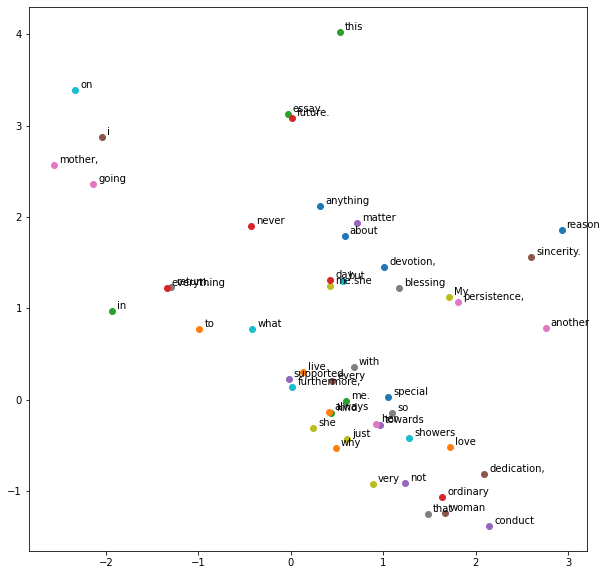

In [71]:
plt.figure(figsize=(10,10))
for i, word in enumerate(vocab[:50]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()


Compared to the standard Skipgram, negative sampling required less time. The change may not be as noticeable because of my extremely small dataset.

##CBOW

In [72]:
cbow = []
for sent in corpus_token:
    # window size 2
    for i in range(2, len(sent) - 2): 
        center_word = sent[i]
        outside_words = [sent[i-2], sent[i-1], sent[i+1], sent[i+2]]
        cbow.append([outside_words, center_word])

In [73]:
def make_context_vector(outside_words, word2idx):
    idxs = [word2idx[w] for w in outside_words]
    return torch.tensor(idxs, dtype=torch.long)

In [74]:
class CBOW(torch.nn.Module):
    def __init__(self, vocab_size, embedding_size):
        super(CBOW, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.linear = nn.Linear(embedding_size, vocab_size)
        self.act_func = nn.LogSoftmax(dim = -1)
        
    def forward(self, inputs):
        embed = sum(self.embedding(inputs)).view(1,-1)
        outside = self.linear(embed)
        outside = self.act_func(outside)
        return outside

Training

In [75]:
embedding_size = 2

In [76]:
len(vocab)

95

In [79]:
model = CBOW(vocab_size, embedding_size)
model

CBOW(
  (embedding): Embedding(94, 2)
  (linear): Linear(in_features=2, out_features=94, bias=True)
  (act_func): LogSoftmax(dim=-1)
)

In [80]:
loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [81]:
epochs = 50000

train_start = time.time()

for epoch in range(epochs):

    start = time.time()
    
    loss = 0
    for context, target in cbow:
        context_vector = make_context_vector(context, word2idx)  

        log_probs = model(context_vector)

        loss += loss_function(log_probs, torch.tensor([word2idx[target]]))

    #optimize at the end of each epoch
    
    optimizer.zero_grad()
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.5f} | time: {epoch_mins}m {epoch_secs}s")

total = time.time() - train_start
print('Total time:', total)

Epoch: 1000 | cost: 216.58891 | time: 0m 0s
Epoch: 2000 | cost: 174.49069 | time: 0m 0s
Epoch: 3000 | cost: 150.35609 | time: 0m 0s
Epoch: 4000 | cost: 132.95381 | time: 0m 0s
Epoch: 5000 | cost: 119.82791 | time: 0m 0s
Epoch: 6000 | cost: 109.38228 | time: 0m 0s
Epoch: 7000 | cost: 100.68503 | time: 0m 0s
Epoch: 8000 | cost: 93.23474 | time: 0m 0s
Epoch: 9000 | cost: 86.70608 | time: 0m 0s
Epoch: 10000 | cost: 80.89675 | time: 0m 0s
Epoch: 11000 | cost: 75.68774 | time: 0m 0s
Epoch: 12000 | cost: 71.00372 | time: 0m 0s
Epoch: 13000 | cost: 66.78941 | time: 0m 0s
Epoch: 14000 | cost: 62.99328 | time: 0m 0s
Epoch: 15000 | cost: 59.55957 | time: 0m 0s
Epoch: 16000 | cost: 56.43153 | time: 0m 0s
Epoch: 17000 | cost: 53.55752 | time: 0m 0s
Epoch: 18000 | cost: 50.89465 | time: 0m 0s
Epoch: 19000 | cost: 48.41234 | time: 0m 0s
Epoch: 20000 | cost: 46.09330 | time: 0m 0s
Epoch: 21000 | cost: 43.92521 | time: 0m 0s
Epoch: 22000 | cost: 41.89355 | time: 0m 0s
Epoch: 23000 | cost: 39.98200 | ti

CBOW training is long time processing